In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
cc = pd.read_csv(r"/Users/kevin/Downloads/creditcard.csv")

pd.set_option('display.max_rows', 1000,'display.max_columns', 1000,"display.max_colwidth", None,'display.width',None)

In [3]:
cc.shape

(284807, 31)

In [4]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
cc.duplicated().sum()

1081

In [7]:
cc.drop_duplicates(inplace = True)

In [8]:
describe = cc.describe().T
describe

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


In [9]:
cc.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
cc.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [11]:
cc.Class.value_counts(normalize = True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

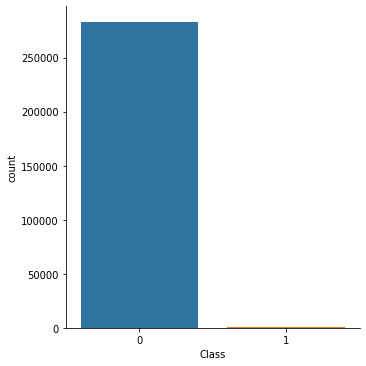

In [12]:
sn.catplot('Class', data = cc, kind = 'count')

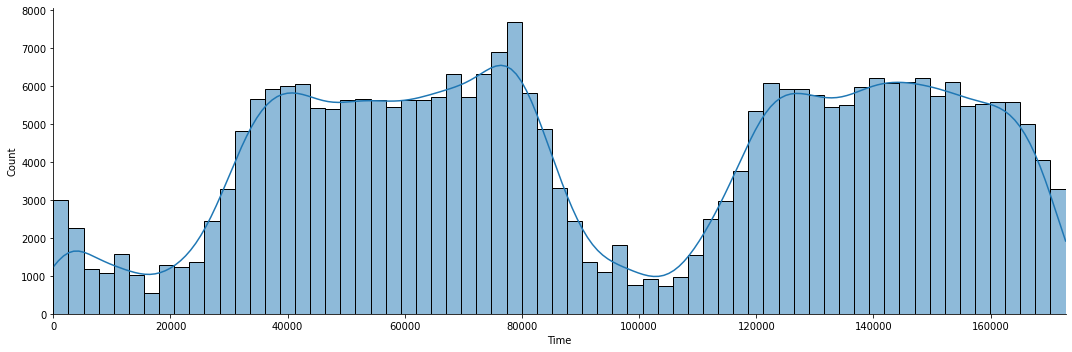

In [13]:
sn.displot(cc.Time, kde = True, aspect = 3).set(xlim = [cc.Time.min(),cc.Time.max()])

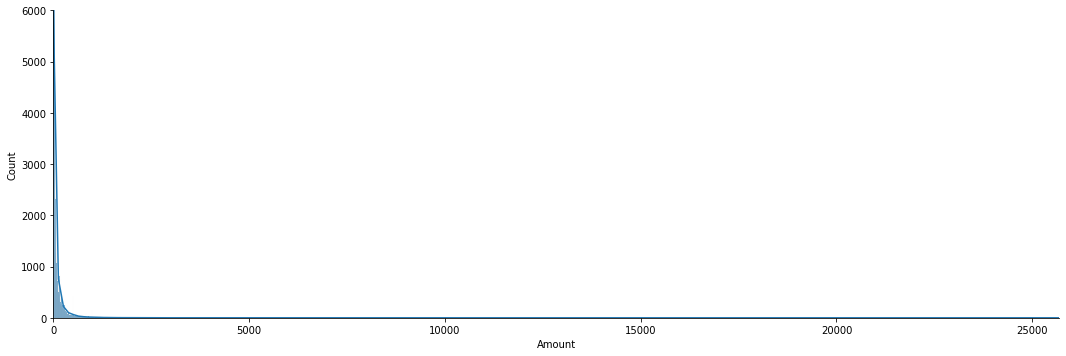

In [14]:
sn.displot(cc.Amount, kde = True, aspect = 3).set(xlim = [cc.Amount.min(),cc.Amount.max()]
                                                 ,ylim = (0, 6000))

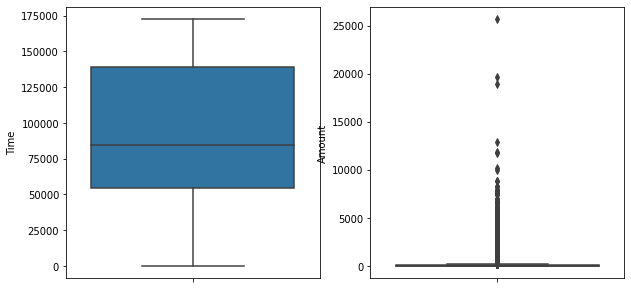

In [15]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))

sn.boxplot(y = 'Time', data = cc, ax = axes[0])
sn.boxplot(y = 'Amount', data = cc, ax = axes[1])

plt.show()

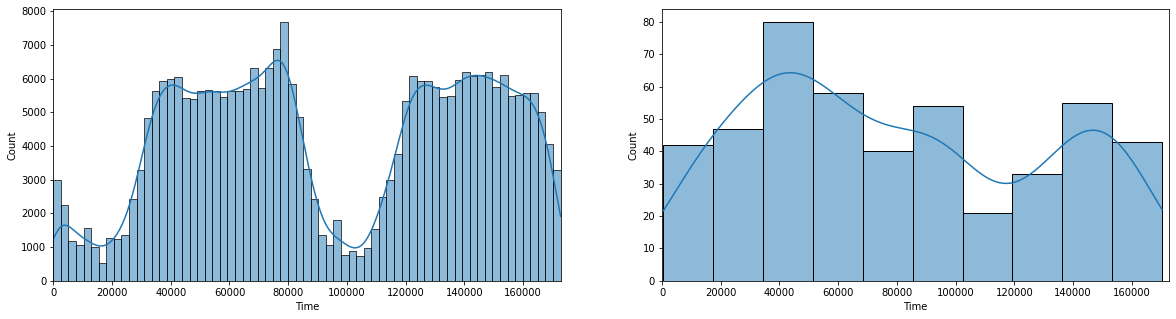

In [16]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))

sn.histplot(data = cc[cc.Class == 0], x = 'Time',  kde = True, ax = axes[0]).set(xlim = [cc.Time.min(),cc.Time.max()])
sn.histplot(data = cc[cc.Class == 1], x = 'Time',  kde = True, ax = axes[1]).set(xlim = [cc.Time.min(),cc.Time.max()])

plt.show()

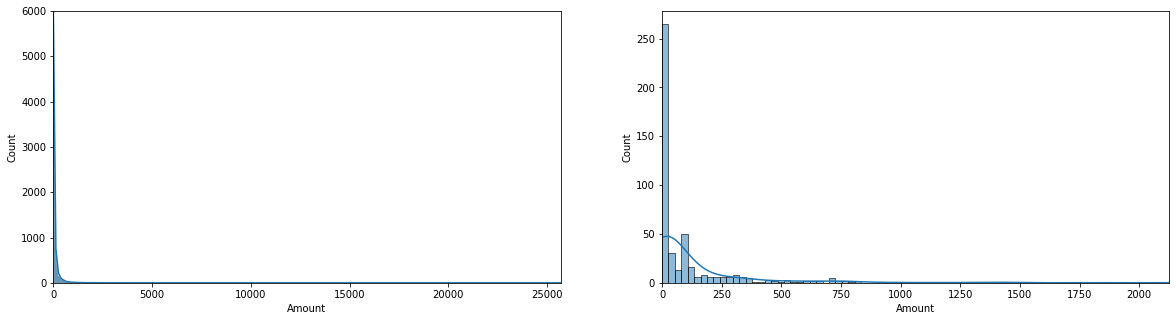

In [17]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))

sn.histplot(data = cc[cc.Class == 0], x = 'Amount',  kde = True, ax = axes[0]).set(xlim = [cc[cc.Class == 0].Amount.min(),cc[cc.Class == 0].Amount.max()]
                                                                                  ,ylim = (0, 6000))
sn.histplot(data = cc[cc.Class == 1], x = 'Amount',  kde = True, ax = axes[1]).set(xlim = [cc[cc.Class == 1].Amount.min(),cc[cc.Class == 1].Amount.max()])

plt.show()

In [18]:
tf_std = StandardScaler().fit(cc['Time'].values.reshape(-1, 1))
cc['Time_scaled'] = tf_std.transform(cc['Time'].values.reshape(-1,1))


tf_rob = RobustScaler().fit(cc['Amount'].values.reshape(-1, 1))
cc['Amount_scaled'] = tf_rob.transform(cc['Amount'].values.reshape(-1,1))

In [19]:
cc[['Time','Time_scaled','Amount','Amount_scaled']].describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,9.481108e+04,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
Time_scaled,283726.0,1.248702e-14,1.000002,-1.996823,-0.855213,-0.213108,0.936942,1.642362
Amount,283726.0,8.847269e+01,250.399437,0.000000,5.600000,22.000000,77.510000,25691.160000
Amount_scaled,283726.0,9.243873e-01,3.482123,-0.305938,-0.228063,0.000000,0.771937,356.962314


In [20]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 33 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time           283726 non-null  float64
 1   V1             283726 non-null  float64
 2   V2             283726 non-null  float64
 3   V3             283726 non-null  float64
 4   V4             283726 non-null  float64
 5   V5             283726 non-null  float64
 6   V6             283726 non-null  float64
 7   V7             283726 non-null  float64
 8   V8             283726 non-null  float64
 9   V9             283726 non-null  float64
 10  V10            283726 non-null  float64
 11  V11            283726 non-null  float64
 12  V12            283726 non-null  float64
 13  V13            283726 non-null  float64
 14  V14            283726 non-null  float64
 15  V15            283726 non-null  float64
 16  V16            283726 non-null  float64
 17  V17            283726 non-nul

<AxesSubplot:>

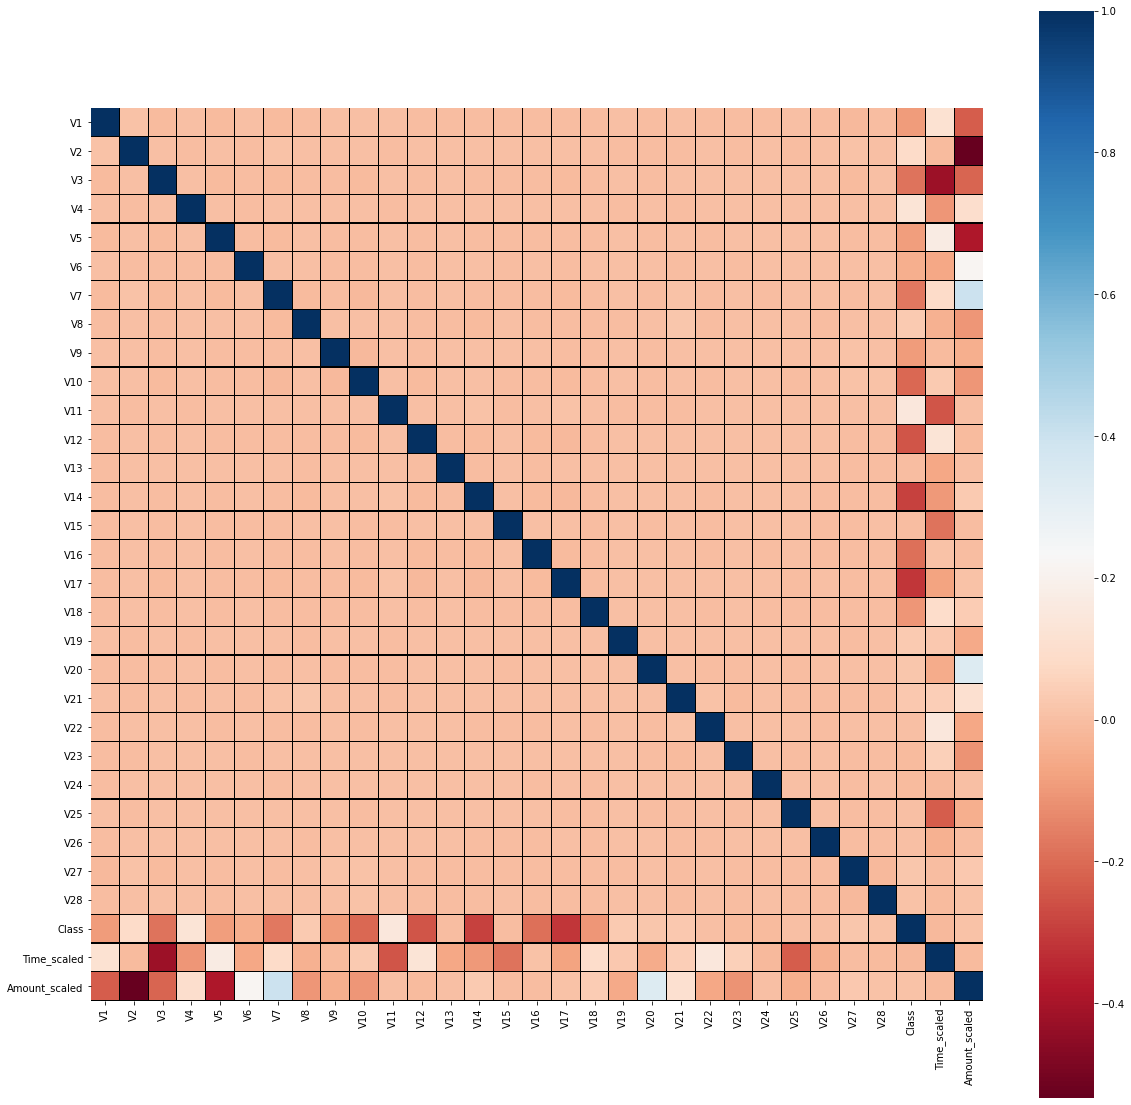

In [21]:
cc.drop(columns = ['Time','Amount'], inplace = True)

plt.figure(figsize = (20,20))
sn.heatmap(cc.corr(), linewidths = .01, square = True, cmap = 'RdBu', linecolor = 'black')

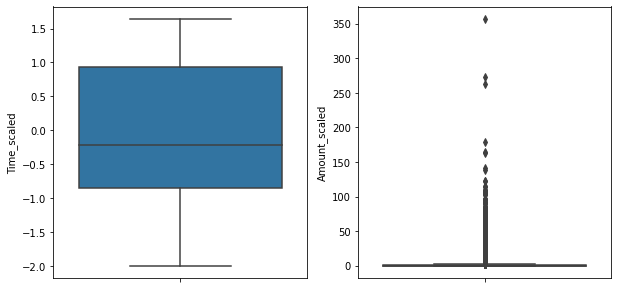

In [22]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))

sn.boxplot(y = 'Time_scaled', data = cc, ax = axes[0])
sn.boxplot(y = 'Amount_scaled', data = cc, ax = axes[1])

plt.show()

In [23]:
x = cc.drop(columns = 'Class')
y = cc['Class']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.3, random_state = 1912) #划分训练集和测试集

print('训练样本数:',Xtrain.shape[0], '测试样本数:',Xtest.shape[0]) 

训练样本数: 198608 测试样本数: 85118


## SMOTE(Synthetic Minority Oversampling Technique)合成少数类过采样技术

<img src="./SMOTE.png" style="zoom:80%" />

<img src="./result_SMOTE.jpeg" style="zoom:40%" />

In [24]:
Ytrain.value_counts()

0    198283
1       325
Name: Class, dtype: int64

In [25]:
sm = SMOTE(random_state = 1912)
Xtrain,Ytrain = sm.fit_resample(Xtrain,Ytrain)

Ytrain.value_counts()

0    198283
1    198283
Name: Class, dtype: int64

In [26]:
#time warnning!

abc = AdaBoostClassifier(n_estimators = 100 )
rfc = RandomForestClassifier(n_estimators = 100)

abc.fit(Xtrain, Ytrain)
rfc.fit(Xtrain, Ytrain)

RandomForestClassifier()

In [27]:
score_train_abc = abc.score(Xtrain, Ytrain)
score_test_abc = abc.score(Xtest, Ytest)

score_train_rfc = rfc.score(Xtrain, Ytrain)
score_test_rfc = rfc.score(Xtest, Ytest)

print('AdaBoost在训练集上的accuracy:',score_train_abc, 'AdaBoost在测试集上的accuracy:',score_test_abc,
     '\n''RandomForest在训练集上的accuracy:',score_train_rfc,'RandomForest在测试集上的accuracy:',score_train_rfc)


AdaBoost在训练集上的accuracy: 0.9812111981359976 AdaBoost在测试集上的accuracy: 0.9863601118447332 
RandomForest在训练集上的accuracy: 1.0 RandomForest在测试集上的accuracy: 1.0


In [28]:
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain, Ytrain)

score_train_dtc = dtc.score(Xtrain, Ytrain)
score_test_dtc = dtc.score(Xtest, Ytest)

print('DecisionTree在训练集上的accuracy:',score_train_dtc, 'DecisionTree在测试集上的accuracy:',score_test_dtc)

DecisionTree在训练集上的accuracy: 1.0 DecisionTree在测试集上的accuracy: 0.9974623463897178


## 混淆矩阵

<img src="./confusion_matrix.jpg" style="zoom:50%" />

### $$Recall = \frac{TP}{TP + FN}(在所有真实正样本中被模型正确识别的比率)$$
### $$Precison = \frac{TP}{TP + FP}(在被模型识别为正样本中真实正样本的比率)$$
### $$F1 =\frac{2}{\frac{1}{Recall} + \frac{1}{Precison}}= \frac{2*Recall*Precison}{Recall + Precison}(Recall和Precison的调和平均数)$$
### $$F_\beta = \frac{\beta^2 + 1}{\frac{\beta^2}{Recall} + \frac{1}{Precison}}= \frac{(\beta^2 + 1)*Recall*Precison}{\beta^2*Precison + Recall}(在F1基础上引入β)$$

In [29]:
from sklearn.metrics import recall_score, precision_score, f1_score, fbeta_score, confusion_matrix

recall_abc, recall_rfc, recall_dtc = recall_score(Ytest, abc.predict(Xtest)), recall_score(Ytest, rfc.predict(Xtest)), recall_score(Ytest, dtc.predict(Xtest))

print('DecisionTree的Recall', recall_dtc,'\n'
     'RandomForest的Recall',recall_rfc,'\n'
     'AdaBoost的Recall',recall_abc)

DecisionTree的Recall 0.7297297297297297 
RandomForest的Recall 0.7837837837837838 
AdaBoost的Recall 0.8716216216216216


In [30]:
precision_abc, precision_rfc, precision_dtc = precision_score(Ytest, abc.predict(Xtest)), precision_score(Ytest, rfc.predict(Xtest)), precision_score(Ytest, dtc.predict(Xtest))

print('DecisionTree的Precision', precision_dtc,'\n'
     'RandomForest的Precision',precision_rfc,'\n'
     'AdaBoost的Precision',precision_abc)

DecisionTree的Precision 0.38028169014084506 
RandomForest的Precision 0.8923076923076924 
AdaBoost的Precision 0.10149488591660111


In [31]:
f1_abc, f1_rfc, f1_dtc = f1_score(Ytest, abc.predict(Xtest)), f1_score(Ytest, rfc.predict(Xtest)), f1_score(Ytest, dtc.predict(Xtest))

print('DecisionTree的F1', f1_dtc,'\n'
     'RandomForest的F1',f1_rfc,'\n'
     'AdaBoost的F1',f1_abc)

DecisionTree的F1 0.5 
RandomForest的F1 0.8345323741007195 
AdaBoost的F1 0.18181818181818185


In [32]:
fbeta_abc, fbeta_rfc, fbeta_dtc = fbeta_score(Ytest,abc.predict(Xtest),10), fbeta_score(Ytest,rfc.predict(Xtest),10), fbeta_score(Ytest,dtc.predict(Xtest),10)

print('DecisionTree的Fβ', fbeta_dtc,'\n'
     'RandomForest的Fβ',fbeta_rfc,'\n'
     'AdaBoost的Fβ',fbeta_abc)

DecisionTree的Fβ 0.7231503579952269 
RandomForest的Fβ 0.7847287340924312 
AdaBoost的Fβ 0.8107149523987306


In [33]:
cnf_matrix_abc,cnf_matrix_rfc,cnf_matrix_dtc = confusion_matrix(Ytest,abc.predict(Xtest)),confusion_matrix(Ytest,rfc.predict(Xtest)),confusion_matrix(Ytest,dtc.predict(Xtest))

print('DecisionTree的混淆矩阵','\n',
      cnf_matrix_dtc,'\n',
      '\n'
     'RandomForest的混淆矩阵','\n',
      cnf_matrix_rfc,'\n',
      '\n'
     'AdaBoost的混淆矩阵','\n',
      cnf_matrix_abc)

DecisionTree的混淆矩阵 
 [[84794   176]
 [   40   108]] 
 
RandomForest的混淆矩阵 
 [[84956    14]
 [   32   116]] 
 
AdaBoost的混淆矩阵 
 [[83828  1142]
 [   19   129]]


In [34]:
fi = pd.concat([pd.DataFrame(Xtrain.columns),pd.DataFrame(abc.feature_importances_)]
               ,axis = 1
               ,ignore_index = True
              )
fi.columns = ['feature','feature importance']
fi.sort_values(by = 'feature importance', ascending = False)[:5]   #前5个重要特征

,feature,feature importance
13,V14,0.12
29,Amount_scaled,0.07
3,V4,0.07
28,Time_scaled,0.05
4,V5,0.04


In [35]:
fi = pd.concat([pd.DataFrame(Xtrain.columns),pd.DataFrame(rfc.feature_importances_)]
               ,axis = 1
               ,ignore_index = True
              )
fi.columns = ['feature','feature importance']
fi.sort_values(by = 'feature importance', ascending = False)[:5]   #前5个重要特征

,feature,feature importance
13,V14,0.192056
3,V4,0.124413
9,V10,0.114469
11,V12,0.099830
16,V17,0.098225


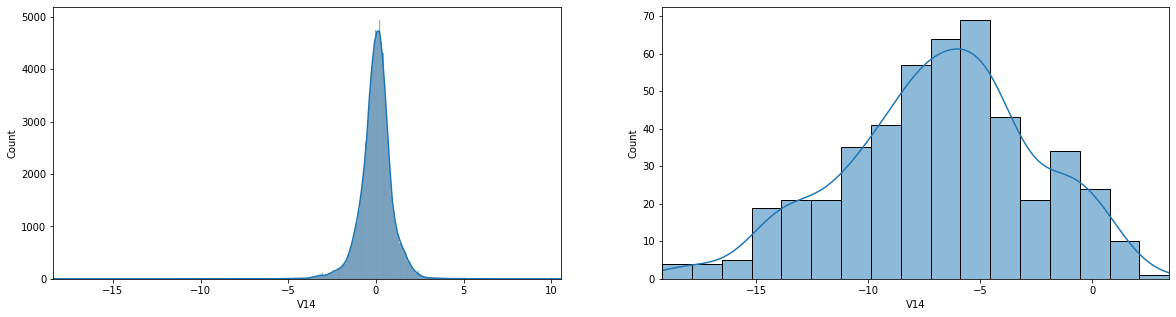

In [36]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))

sn.histplot(data = cc[cc.Class == 0], x = 'V14',  kde = True, ax = axes[0]).set(xlim = [cc[cc.Class == 0].V14.min(),cc[cc.Class == 0].V14.max()])
sn.histplot(data = cc[cc.Class == 1], x = 'V14',  kde = True, ax = axes[1]).set(xlim = [cc[cc.Class == 1].V14.min(),cc[cc.Class == 1].V14.max()])

plt.show()

In [37]:
fi = pd.concat([pd.DataFrame(Xtrain.columns),pd.DataFrame(dtc.feature_importances_)]
               ,axis = 1
               ,ignore_index = True
              )
fi.columns = ['feature','feature importance']
fi.sort_values(by = 'feature importance', ascending = False)[:5]   #前5个重要特征

,feature,feature importance
13,V14,0.750306
3,V4,0.038190
11,V12,0.026974
9,V10,0.025112
7,V8,0.018894
